In [29]:
def O2sol(S,T):
    import numpy as np
    
    '''
    % O2sol   Solubility of O2 in sea water
    %=========================================================================
    % O2sol Version 1.1 4/4/2005
    %          Author: Roberta C. Hamme (Scripps Inst of Oceanography)
    %          Translated into python by Julia Neme
    %
    % USAGE:  concO2 = O2sol(S,T)
    %
    % DESCRIPTION:
    %    Solubility (saturation) of oxygen (O2) in sea water
    %    at 1-atm pressure of air including saturated water vapor
    %
    % INPUT:  (if S and T are not singular they must have same dimensions)
    %   S = salinity    [PSS]
    %   T = temperature [degree C]
    %
    % OUTPUT:
    %   concO2 = solubility of O2  [umol/kg] 
    % 
    % AUTHOR:  Roberta Hamme (rhamme@ucsd.edu)
    %
    % REFERENCE:
    %    Hernan E. Garcia and Louis I. Gordon, 1992.
    %    "Oxygen solubility in seawater: Better fitting equations"
    %    Limnology and Oceanography, 37, pp. 1307-1312.
    %
    % DISCLAIMER:
    %    This software is provided "as is" without warranty of any kind.  
    %=========================================================================

    % CALLER: general purpose
    % CALLEE: sw_dens_0.m
    '''
        
    # Check S,T dimensions and verify consistent
    shape_S = np.shape(S);
    shape_T = np.shape(T);

    # Check that T&S have the same shape or are singular
    if shape_S != shape_T:
        raise ValueError('S & T must have same dimensions or be singular')\
        
    # Convert T to scaled temperature
    temp_S = np.log((298.15 - T)/(273.15 + T));

    # Constants from Table 1 of Garcia & Gordon for the fit to Benson and Krause (1984)
    A0_o2 = 5.80871; 
    A1_o2 = 3.20291;
    A2_o2 = 4.17887;
    A3_o2 = 5.10006;
    A4_o2 = -9.86643e-2;
    A5_o2 = 3.80369;
    B0_o2 = -7.01577e-3;
    B1_o2 = -7.70028e-3;
    B2_o2 = -1.13864e-2;
    B3_o2 = -9.51519e-3;
    C0_o2 = -2.75915e-7;

    # Corrected Eqn (8) of Garcia and Gordon 1992
    conc_O2 = np.exp(A0_o2 + A1_o2*temp_S + A2_o2*temp_S**2 + A3_o2*temp_S**3 + A4_o2*temp_S**4 + A5_o2*temp_S**5 + S*(B0_o2 + B1_o2*temp_S + B2_o2*temp_S**2 + B3_o2*temp_S**3) + C0_o2*S**2);

    return conc_O2

You can run your calculations here. For example, let's open an example `.csv` file and calculate the solubility for a CTD profile:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('CC2225003_20221114_003455.csv', skiprows = 28)
depth = data.iloc[:,1] 
temperature = data.iloc[:,2]
salinity = data.iloc[:,5] 

In [40]:
conc_O2 = O2sol(salinity, temperature)

Text(0.5, 0, 'Solubility of O2 (umol/kg)')

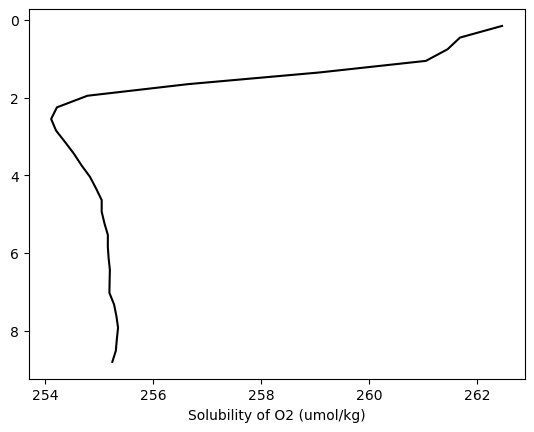

In [44]:
plt.plot(conc_O2, depth, color = 'k')
plt.gca().invert_yaxis()
plt.xlabel('Solubility of O2 (umol/kg)')